In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import os
import pandas as pd

# SVD to compress image

Pega o SVD da imagem e plota os valores singulares diagonais. Trunca o SVD para diferentes rank-r.

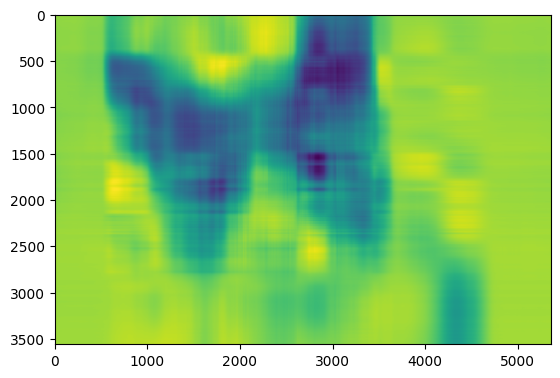

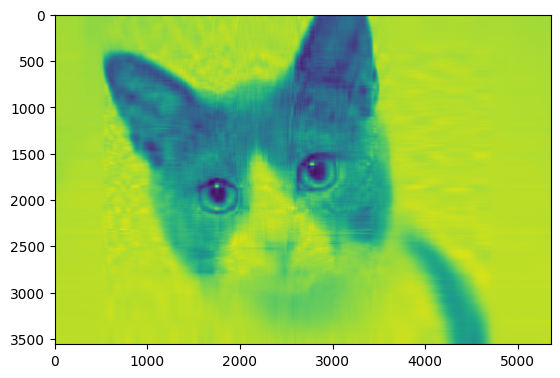

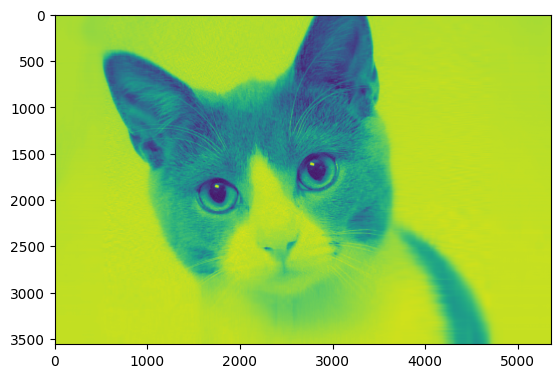

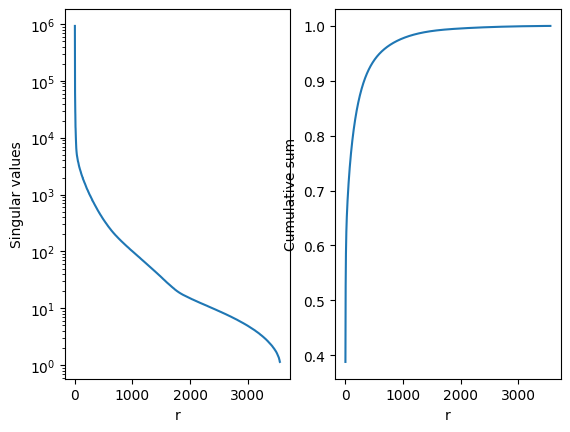

In [5]:
# First, we load the image
A = imread("/content/drive/MyDrive/Colab Notebooks/dataDrivenFiles/cat.jpg")
X = np.mean(A, -1); # Convert RGB to grayscale
img = plt.imshow(X)

# Take the SVD
U, S, VT = np.linalg.svd (X, full_matrices=False)
S = np.diag(S)

# Approximate matrix with truncated SVD for various ranks r
for r in (5, 20, 100): # Construct approximate image
  Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
  img = plt.imshow(Xapprox)
  plt.show()

# Plot singular values and cumulative sum
plt.subplot(1,2,1)
plt.ylabel('Singular values')
plt.xlabel('r')
plt.semilogy(np.diag(S))
plt.subplot(1,2,2)
plt.ylabel('Cumulative sum')
plt.xlabel('r')
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))

# Least-squares fit of noisy data

Adiciona ruído e relaciona com a reta, usando pseudo-inverso para encontrar a solução mínimos-quadrados (regressão).

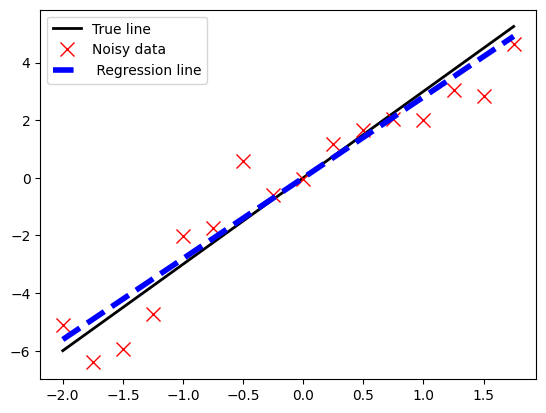

In [ ]:
x = 3 # True slope
a = np.arange(-2,2, 0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn (*a. shape) # Add noise

plt.plot(a, x*a, '-k', linewidth = 2, label='True line') # True relationship
plt.plot (a, b, 'xr', ms = 10, label='Noisy data') # Noisy measurements

# Compute least-squares approximation with the SVD
U, S, VT = np.linalg.svd (a, full_matrices=False)
xtilde = VT.T@ np.linalg.inv (np. diag (S)) @ U.T@ b # Least- square fit

plt.plot(a,xtilde*a,'--b', linewidth = 4, label =' Regression line')
plt.legend()

# Alternative formulations of least squares
xtildel = VT.T @ np.linalg.inv(np.diag (S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) @ b

# Multi-linear Regression for Cement Heat Data

O dataset descreve 13 texturas de cimento com base em 4 ingredientes (A13x4). O objetivo é determinar o peso x que relata a proporção dos ingredientes para a geração de calor. Sistema linear Ax = b.

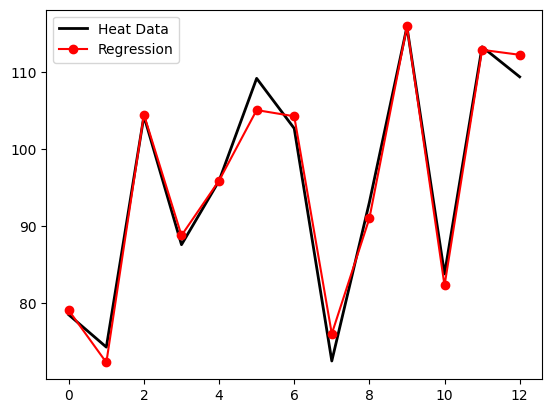

In [ ]:
# Load dataset
A = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/dataDrivenFiles/hald_ingredients.csv',delimiter=',')
b = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/dataDrivenFiles/hald_heat.csv',delimiter=',')

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(b, color='k', linewidth=2, label='Heat Data') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.legend()
plt.show()

# Boston Housing Data

Há 13 atributos correlacionados com o preço de 506 casas em Boston. É feita a regressão para predizer o valor das casas, em comparação com o valor real.

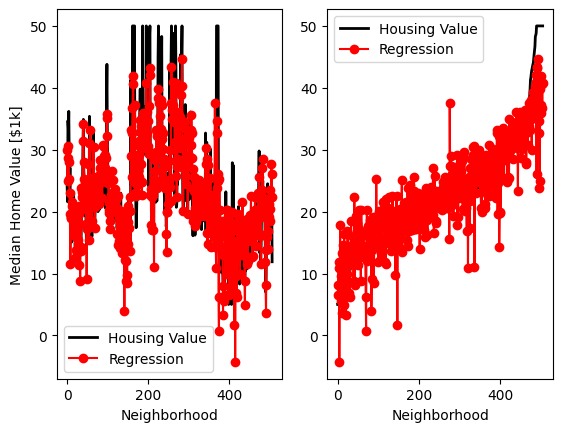

In [ ]:
# Load dataset
H = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/dataDrivenFiles/housing.data')
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
plt.plot(b[sort_ind], color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()